In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
filepath_1 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgDJF_400BCE.nc")
filepath_2 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgJJA_400BCE.nc")
filepath_3 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgMAM_400BCE.nc")
filepath_4 = ("/volumes/TOSHIBA/MIT/trace.01-36.22000BP.cam2.PRECT.22000BP_decavgSON_400BCE.nc")

test_1 = xr.open_dataset(filepath_1).sel(time=slice(-20,0))*86400000
test_2 = xr.open_dataset(filepath_2).sel(time=slice(-20,0))*86400000
test_3 = xr.open_dataset(filepath_3).sel(time=slice(-20,0))*86400000
test_4 = xr.open_dataset(filepath_4).sel(time=slice(-20,0))*86400000

trace_djf = test_1.PRECT.sel(lon= (46.88), lat=(-15.53), method = "nearest")
trace_djf['time'] = trace_djf['time']*-1000

trace_jja = test_2.PRECT.sel(lon= (46.88), lat=(-15.53), method = "nearest")
trace_mam = test_3.PRECT.sel(lon= (46.88), lat=(-15.53), method = "nearest")
trace_son = test_4.PRECT.sel(lon= (46.88), lat=(-15.53), method = "nearest")

In [3]:
df1 = pd.read_excel('/volumes/TOSHIBA/MIT/AB11Date.xlsx')
df2 = pd.read_csv('/volumes/TOSHIBA/MIT/ab12_corrected.csv')
df3 = pd.read_excel('/volumes/TOSHIBA/MIT/AB2Date.xlsx')
df4 = pd.read_excel('/volumes/TOSHIBA/MIT/AB3Date.xlsx')
df5 = pd.read_excel('/volumes/TOSHIBA/MIT/ANJ945Date.xlsx')
df5_1 = pd.read_excel('/volumes/TOSHIBA/MIT/ANJ945Date(1).xlsx')
df6 = pd.read_excel('/volumes/TOSHIBA/MIT/ANJB2Date(1).xlsx')
df6_1 = pd.read_excel('/volumes/TOSHIBA/MIT/ANJB2Date(2).xlsx')
df7 = pd.read_excel('/volumes/TOSHIBA/MIT/MA2Date.xlsx')
df8 = pd.read_excel('/volumes/TOSHIBA/MIT/MA3Date.xlsx')
df9 = pd.read_excel('/volumes/TOSHIBA/MIT/ABC-1Date.xlsx')
#df9_1 = pd.read_excel('Desktop/MIT/ABC1_1Date.xlsx')
df10 = pd.read_excel('/volumes/TOSHIBA/MIT/ABC-1_Corrected.xlsx')

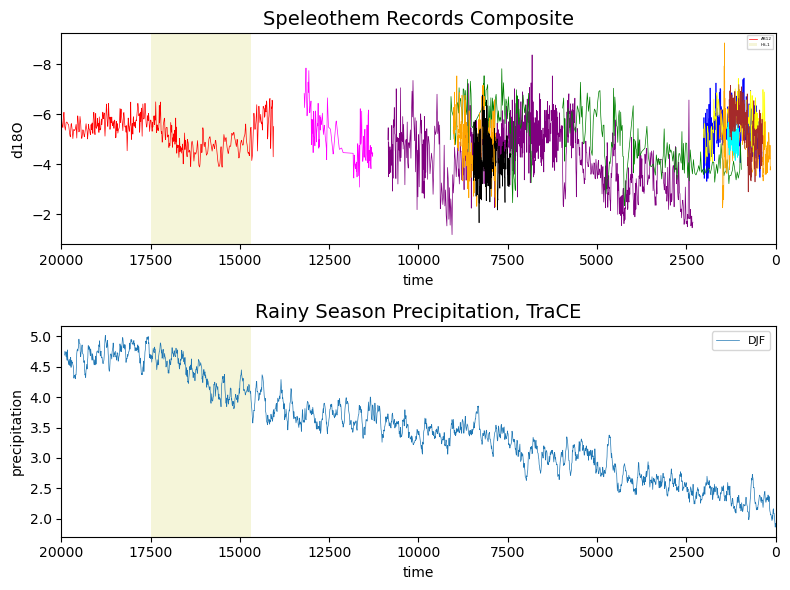

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(8,6))

plt.subplot(211)
plt.plot(df1['Date'],df1['d18O'], color = 'purple', linewidth = 0.5)
plt.plot(df2['age']*1000,df2['corrected d18O'], color = 'red', label = "AB12",linewidth = 0.5)
plt.plot(df3['Date'],df3['d18O'], color = 'blue',linewidth = 0.5)
plt.plot(df4['Date'],df4['d18O'], color = 'yellow',linewidth = 0.5)
plt.plot(df5['Date'],df5['d18O'], color = 'green', linewidth = 0.5)
plt.plot(df5_1['Date'],df5_1['d18O'], color = 'green', linewidth = 0.5)
plt.plot(df6['Date'],df6['d18O'], color = 'orange', linewidth = 0.5)
plt.plot(df6_1['Date'],df6_1['d18O'], color = 'orange', linewidth = 0.5)
plt.plot(df7['Date'],df7['d18O'], color = 'cyan',linewidth = 0.5)
plt.plot(df8['Date'],df8['d18O'], color = 'brown', linewidth = 0.5)
plt.plot(df9['Date'],df9['d18O'], color = 'black',linewidth = 0.5)
#plt.plot(df9_1['Date'],df9_1['d18O'], color = 'black')
plt.plot(df10['age'],df10['d18O'], color = 'magenta',linewidth = 0.5)

#plt.axvspan(11700, 12900, facecolor='b', alpha=0.15, label = "YD")
#plt.axvspan(12900, 14700, facecolor='g', alpha=0.15, label = "B-A")
plt.axvspan(14700, 17500, facecolor='y', alpha=0.15, label = "HS-1")
#plt.axvspan(17500, 20000, facecolor='m', alpha=0.15, label = "LGM")
#plt.axvspan(8100, 8300, facecolor='r', alpha=0.15, label = "8.2ky")

plt.xlim(0, 20000)
#plt.ylim(-8, -2.5)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('time')
plt.ylabel('d18O')

plt.legend(loc = "best", fontsize = 3)

plt.title('Speleothem Records Composite', fontsize = 14)

#ax2.plot(x, y)
#ax2.xaxis.set_inverted(True)  

plt.subplot(212)

trace_djf.rolling(time = 10).mean().plot(linewidth = 0.5)

#plt.axvspan(11700, 12900, facecolor='b', alpha=0.15, label = "YD")
#plt.axvspan(12900, 14700, facecolor='g', alpha=0.15, label = "B-A")
plt.axvspan(14700, 17500, facecolor='y', alpha=0.15, label = "HS-1")
#plt.axvspan(17500, 20000, facecolor='m', alpha=0.15, label = "LGM")
#plt.axvspan(8100, 8300, facecolor='r', alpha=0.15, label = "8.2ky")
#trace_jja.plot()
#trace_mam.plot()
#trace_son.plot()

plt.xlim(20000, 0)
plt.xlabel('time')
plt.ylabel('precipitation')
plt. title("Rainy Season Precipitation, TraCE",fontsize = 14)
plt.legend(["DJF"], fontsize = 8)

fig.tight_layout()